In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('weather_forecast_data.csv')
data.head()

# Replace categorical text with numeric values
data['Rain'] = data['Rain'].map({'no rain': 0, 'rain': 1})

In [12]:
X = data[['Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure', 'Rain']]
y = data['Temperature']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}\nR2 Score: {r2: 3f}")

Mean Squared Error: 48.765
R2 Score:  0.058851


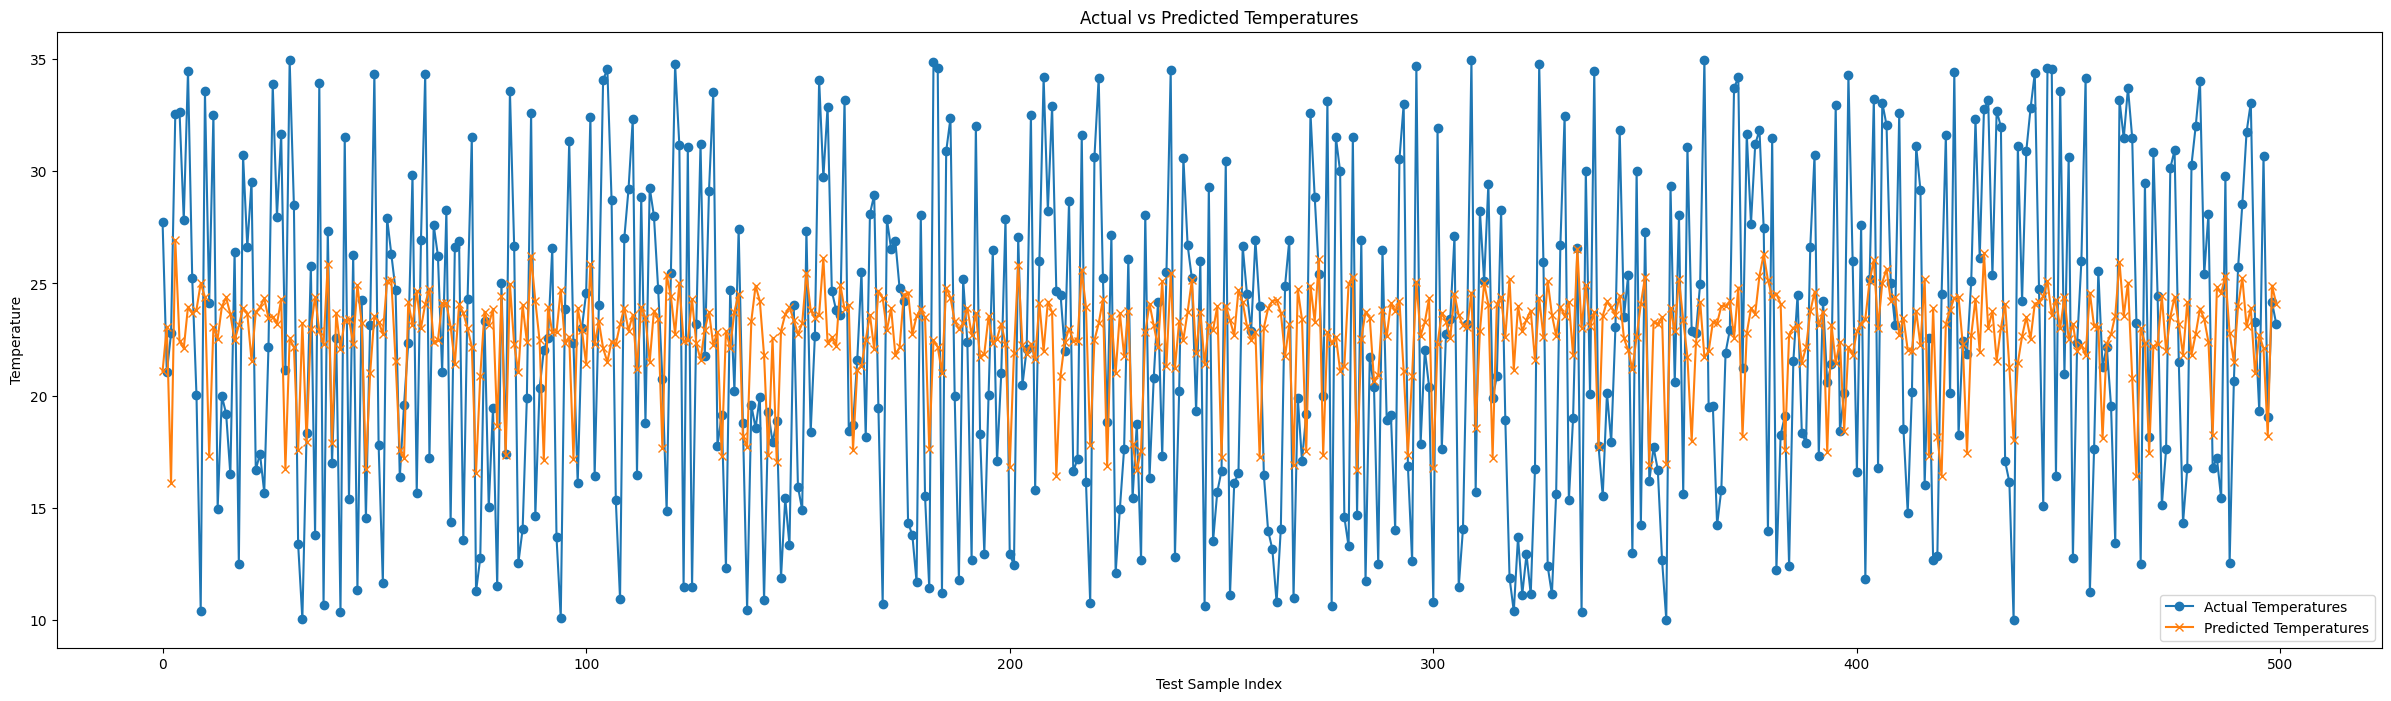

In [20]:
plt.figure(figsize=(30,8))
plt.plot(y_test.values, label="Actual Temperatures", marker="o") 
plt.plot(y_pred, label="Predicted Temperatures", marker="x")      
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Test Sample Index")
plt.ylabel("Temperature")
plt.legend()
plt.show()


In [22]:
def user_input():
    try:
        hum = float(input("Enter Humidity (%): "))
        wind = float(input("Enter Wind Speed (km/h): "))
        cloud = float(input("Enter Cloud Cover (%): "))
        pressure = float(input("Enter Pressure (hPa): "))
        rain_input = input("Enter Rain condition ('rain' or 'no rain'): ").strip().lower()

        # Convert rain input to numeric
        if rain_input == 'rain':
            rain = 1
        elif rain_input == 'no rain':
            rain = 0
        else:
            print("Invalid input for rain. Please enter 'rain' or 'no rain'.")
            return

        # Create input DataFrame
        new_data = pd.DataFrame({
            'Humidity': [hum],
            'Wind_Speed': [wind],
            'Cloud_Cover': [cloud],
            'Pressure': [pressure],
            'Rain': [rain]
        })

        # Predict temperature
        predicted_temp = model.predict(new_data)
        print(f"\n📈 The predicted temperature is: {predicted_temp[0]:.2f}°C")

    except ValueError:
        print("❌ Invalid input. Please enter numeric values for the weather features.")

# Call the function
user_input()



📈 The predicted temperature is: 16.94°C
